In [11]:
# imports
# -------
import numpy as np 
from matplotlib import pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split ,StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score ,precision_score ,recall_score ,f1_score ,confusion_matrix

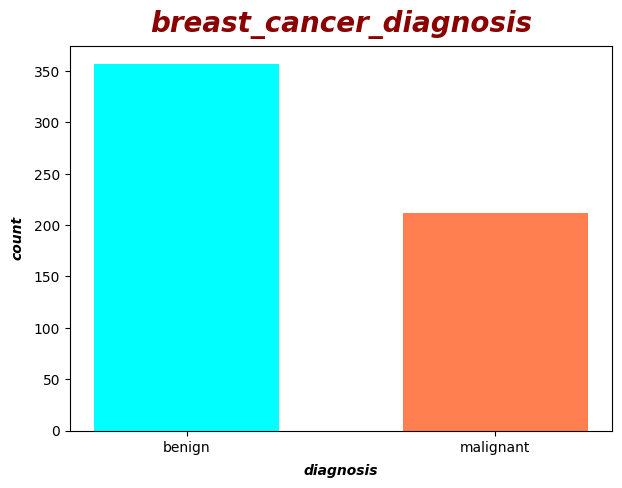

In [12]:
# prepration
# ----------
breast_cancer_sp =load_breast_cancer(return_X_y =True)
x =breast_cancer_sp[0].astype(np.float32) 
y =breast_cancer_sp[1].astype(np.int32).reshape(-1,1)
pca =PCA(20)
x_reduce =pca.fit_transform(x)
x_reduce_norm =normalize(x_reduce ,'l2') 
x_train ,x_test ,y_train ,y_test =train_test_split(x_reduce_norm ,y ,test_size =0.2)
labels =['benign','malignant']
colors =['aqua','coral']
labels_count =[]
labels_count.append(list(y).count(1))
labels_count.append(list(y).count(0))
plt.figure(1 ,(7,5) ,100)
plt.bar(labels ,labels_count ,0.6 ,color =colors)
plt.xlabel('diagnosis' ,{'size' :10 ,'weight' :'bold' ,'style' :'italic'} ,7)
plt.ylabel('count' ,{'size' :10 ,'weight' :'bold' ,'style' :'italic'} ,7)
plt.title('breast_cancer_diagnosis' ,{'size' :20 ,'weight' :'bold' ,'style' :'italic' ,'color' :'darkRed'} ,pad =10)
plt.show()

In [13]:
# details
# -------
def eva_scores(y_true ,y_pred) :
    # acc =[(TP+TN)/(TP+FP+FN+TN)]
    accuracy =accuracy_score(y_true =y_true ,y_pred =y_pred)
    # pre =[TP/(TP+FP)]
    precision =precision_score(y_true =y_true ,y_pred =y_pred)
    # rec(sensitivity) =[TP/(TP+FN)]
    sensitivity =recall_score(y_true =y_true ,y_pred =y_pred)
    # rec(specificity) =[TN/(TN+FP)]
    specificity =recall_score(y_true =y_true ,y_pred =y_pred ,pos_label =0)
    # f1 =[2*(pre*rec)/(pre+rec)]
    f1 =f1_score(y_true =y_true ,y_pred =y_pred) 
    return {'accuracy_score' : accuracy , 
            'precision_score' : precision , 
            'sensitivity_score' : sensitivity ,
            'specificity_score' : specificity ,
            'f1_score' : f1
}        

def cv_score(est) :
    skf =StratifiedKFold(n_splits =5 ,shuffle =True) 
    acc_total_cv =[]
    for tr ,val in skf.split(x_train ,y_train): 
        x_train_cv =x_train[tr] 
        y_train_cv =y_train[tr] 
        x_val_cv =x_train[val] 
        y_val_cv =y_train[val]
        est.fit(x_train_cv ,y_train_cv) 
        Y_cv =est.predict(x_val_cv) 
        acc_cv =accuracy_score(y_true=y_val_cv ,y_pred=Y_cv)
        acc_total_cv.append(acc_cv)
    acc_mean_cv =np.mean(acc_total_cv)
    return acc_mean_cv

In [15]:
# K-nearest_neighbors_model
# -------------------------
Knn =KNeighborsClassifier(n_neighbors =10)
# training
Knn.fit(x_train ,y_train)
# prediction
Y_test_knn =Knn.predict(x_test)
# evaluation_scores
print(' evaluation_scores :',
    '\n',
    eva_scores(y_test,Y_test_knn),
    '\n')
# cross_validation_score
print(' cv_score :',
    '\n',
    cv_score(Knn),
    '\n')

 evaluation_scores : 
 {'accuracy_score': 0.9649122807017544, 'precision_score': 0.9722222222222222, 'sensitivity_score': 0.9722222222222222, 'specificity_score': 0.9523809523809523, 'f1_score': 0.9722222222222222} 

 cv_score : 
 0.9274725274725275 



c:\Users\fujitsu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\fujitsu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\fujitsu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\fujitsu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.

In [17]:
# gaussian_naive_bayes_model
# --------------------------
Gnb =GaussianNB()
# training
Gnb.fit(x_train ,y_train)
# prediction
Y_test_gnb =Gnb.predict(x_test) 
# evaluation_scores
print(' evaluation_scores :',
    '\n',
    eva_scores(y_test,Y_test_gnb),
    '\n')
# cross_validation_score
print(' cv_score :',
    '\n',
    cv_score(Gnb),
    '\n')

 evaluation_scores : 
 {'accuracy_score': 0.956140350877193, 'precision_score': 0.971830985915493, 'sensitivity_score': 0.9583333333333334, 'specificity_score': 0.9523809523809523, 'f1_score': 0.965034965034965} 

 cv_score : 
 0.9010989010989011 



c:\Users\fujitsu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\fujitsu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\fujitsu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\fujitsu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:133

In [18]:
# decision_trees_model
# --------------------
Dt =DecisionTreeClassifier(max_depth =10 ,min_samples_split =50)
# training
Dt.fit(x_train ,y_train) 
# prediction
Y_test_dt =Dt.predict(x_test)
# evaluation_scores
print(' evaluation_scores :',
    '\n',
    eva_scores(y_test,Y_test_dt),
    '\n')
# cross_validation_score
print(' cv_score :',
    '\n',
    cv_score(Dt),
    '\n')

 evaluation_scores : 
 {'accuracy_score': 0.8947368421052632, 'precision_score': 0.96875, 'sensitivity_score': 0.8611111111111112, 'specificity_score': 0.9523809523809523, 'f1_score': 0.9117647058823529} 

 cv_score : 
 0.9142857142857143 



In [19]:
# random_forest_model
# -------------------
Rf =RandomForestClassifier(n_estimators =30 ,max_depth =10 ,min_samples_split =50)
# training
Rf.fit(x_train ,y_train) 
# prediction
Y_test_rf =Rf.predict(x_test)
# evaluation_scores
print(' evaluation_scores :',
    '\n',
    eva_scores(y_test,Y_test_rf),
    '\n')
# cross_validation_score
print(' cv_score :',
    '\n',
    cv_score(Rf),
    '\n')

c:\Users\fujitsu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\fujitsu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


 evaluation_scores : 
 {'accuracy_score': 0.9736842105263158, 'precision_score': 0.9859154929577465, 'sensitivity_score': 0.9722222222222222, 'specificity_score': 0.9761904761904762, 'f1_score': 0.9790209790209791} 



c:\Users\fujitsu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\fujitsu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\fujitsu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


 cv_score : 
 0.945054945054945 



c:\Users\fujitsu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [20]:
# support_vector_machines_model
# -----------------------------
Svm =SVC(kernel ='poly' ,degree =3 ,max_iter =30)
# training
Svm.fit(x_train ,y_train) 
# prediction
Y_test_svm =Svm.predict(x_test) 
# evaluation_scores
print(' evaluation_scores :',
    '\n',
    eva_scores(y_test,Y_test_svm),
    '\n')
# cross_validation_score
print(' cv_score :',
    '\n',
    cv_score(Svm),
    '\n')

 evaluation_scores : 
 {'accuracy_score': 0.956140350877193, 'precision_score': 0.958904109589041, 'sensitivity_score': 0.9722222222222222, 'specificity_score': 0.9285714285714286, 'f1_score': 0.9655172413793104} 

 cv_score : 
 0.9186813186813186 



c:\Users\fujitsu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\fujitsu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=30).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\fujitsu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\fujitsu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=

In [21]:
# logestic_regression_model
# -------------------------
Lr =LogisticRegression('l1' ,solver ='liblinear')
# training 
Lr.fit(x_train ,y_train) 
# prediction
Y_test_lr =Lr.predict(x_test) 
# evaluation_scores
print(' evaluation_scores :',
    '\n',
    eva_scores(y_test,Y_test_lr),
    '\n')
# cross_validation_score
print(' cv_score :',
    '\n',
    cv_score(Lr),
    '\n')

 evaluation_scores : 
 {'accuracy_score': 0.9736842105263158, 'precision_score': 0.96, 'sensitivity_score': 1.0, 'specificity_score': 0.9285714285714286, 'f1_score': 0.9795918367346939} 

 cv_score : 
 0.9252747252747253 



c:\Users\fujitsu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\fujitsu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\fujitsu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\fujitsu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:133

In [22]:
# multi_layer_perceptron_model 
# ----------------------------
Mlp =MLPClassifier(hidden_layer_sizes =(10,) ,activation ='tanh' ,batch_size =50 ,learning_rate_init =0.05 ,max_iter =100)
# training
Mlp.fit(x_train ,y_train) 
# prediction
Y_test_mlp =Mlp.predict(x_test)
# evaluation_scores
print(' evaluation_scores :',
    '\n',
    eva_scores(y_test,Y_test_mlp),
    '\n')
# cross_validation_score
print(' cv_score :',
    '\n',
    cv_score(Mlp),
    '\n')

c:\Users\fujitsu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\fujitsu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\fujitsu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


 evaluation_scores : 
 {'accuracy_score': 0.9736842105263158, 'precision_score': 0.9726027397260274, 'sensitivity_score': 0.9861111111111112, 'specificity_score': 0.9523809523809523, 'f1_score': 0.9793103448275862} 



c:\Users\fujitsu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\fujitsu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\fujitsu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\fujitsu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\

 cv_score : 
 0.945054945054945 



c:\Users\fujitsu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
